In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import plot_confusion_matrix
import matplotlib.patches as patches
import itertools
from sklearn.model_selection import StratifiedKFold
from scipy import interp
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import validation_curve



%matplotlib inline

In [5]:
MLdata= pd.read_csv('2019H1BNumericNew1.csv')
pd.options.display.max_seq_items = None
MLdata.head()

,CASE_STATUS,CASE_SUBMITTED,SOC_CODE,FULL_TIME_POSITION,TOTAL_WORKER_POSITIONS,AGENT_REPRESENTING_EMPLOYER,H-1B_DEPENDENT,WILLFUL_VIOLATOR,NumOfNaN,PERIOD_OF_EMPLOYMENT_LENGTH,Annual_Wage,Fortune,EMPLOYER_REGION
0,0,3,11.0,1,0,1.0,0.0,0.0,5.0,3,0,0,4.0
1,0,1,13.0,1,0,0.0,1.0,0.0,12.0,2,2,0,4.0
2,0,1,15.0,1,0,1.0,0.0,0.0,10.0,3,2,0,2.0
3,0,0,11.0,0,0,0.0,0.0,0.0,18.0,3,2,0,4.0
4,0,2,51.0,1,0,0.0,0.0,0.0,17.0,3,0,0,4.0


In [3]:
# fill all the data with mode
for column in MLdata.columns:
    MLdata[column] = MLdata[column].fillna(MLdata[column].mode()[0])
    MLdata[column] = pd.to_numeric(MLdata[column]) # convert all columns of DataFrame to float

MLdata.isnull().sum()
xdata = MLdata.loc[:,MLdata.columns[1:]]
ydata = MLdata.loc[:,['CASE_STATUS']]

In [4]:
def Kfold(xdata,ydata,max_iter,C,dual):
    train_accuracy =[]
    test_accuracy = []
    ACC = []
    TPR = []
    TNR = []
    PPV = []
    f1 = []
    ConfusionBox = np.array([[0,0],[0,0]])
    cv = StratifiedKFold(n_splits=5,shuffle=False)

    for train,test in cv.split(xdata,ydata):
        xtrain = xdata.iloc[train]
        ytrain = ydata.iloc[train]
        xtest = xdata.iloc[test]
        ytest = ydata.iloc[test]
    
#####where you need to modify -------------------------------------------------------------------------    
        knn = LogisticRegression(max_iter=max_iter,C=C,dual=dual)
        knn.fit(xtrain,np.ravel(ytrain))
        ypred = knn.predict(xtest)
        #Compute accuracy on the training set
        train_accuracy.append(knn.score(xtrain,ytrain))
        #Compute accuracy on the test set
        test_accuracy.append(knn.score(xtest,ytest))
#####where you need to modify -------------------------------------------------------------------------    

        
        CM = confusion_matrix(ytest,ypred)
        TN = CM[0][0]
        FN = CM[1][0]
        TP = CM[1][1]
        FP = CM[0][1]
        ConfusionBox += CM
        # Overall accuracy
        ACC.append((TP+TN)/(TP+FP+FN+TN))
        # Sensitivity, hit rate, recall, or true positive rate
        TPR.append(TP/(TP+FN))
        # Specificity or true negative rate
        TNR.append(TN/(TN+FP))
        # Precision or positive predictive value
        PPV.append(TP/(TP+FP))
        # f1 score
        f1.append(f1_score(ytest,ypred))
    
#     return train_accuracy,test_accuracy, ACC,TPR,TNR,PPV,f1,ConfusionBox
    return np.mean(train_accuracy),np.mean(test_accuracy),np.mean(ACC),np.mean(TPR),np.mean(TNR),np.mean(PPV),np.mean(f1),ConfusionBox
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#####where you need to modify -------------------------------------------------------------------------    
def KNNAucRocCurve(max_iter,C,dual):
    knn = LogisticRegression(max_iter=max_iter,C=C,dual=dual)
    knn.fit(xtrain,np.ravel(ytrain))
    ypred = knn.predict_proba(xtest)[:,1]
#####where you need to modify -------------------------------------------------------------------------    
    
    fpr, tpr, thresholds = roc_curve(ytest, ypred)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr, label='Knn')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Logistic Regression K={}, ROC curve'.format(n_neighbors))
    plt.show()
    

C:\Users\amirt\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\amirt\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

Confusion matrix
[[  814  4349]
 [  594 14895]]
Accuracy = 0.7606528445234548
Sensitivity = 0.9616503444783921
Specificity = 0.15766376250403358
Precision = 0.7740183760296653
F1 score = 0.8576891821748314


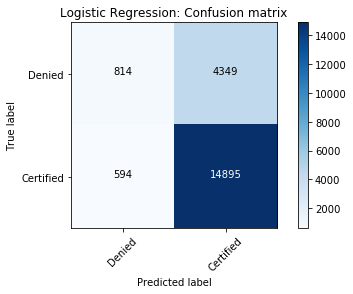

In [5]:
# Confusion Box
#####where you need to modify -------------------------------------------------------------------------    
train_accuracy,test_accuracy,ACC,TPR,TNR,PPV,f1,ConfusionBox=Kfold(xdata,ydata,max_iter=110,C=1.5,dual=False)
plt.figure()
plot_confusion_matrix(ConfusionBox,classes=['Denied','Certified'],title='Logistic Regression: Confusion matrix')
#####where you need to modify ----------------http://localhost:8888/notebooks/Google%20Drive/ISYE%207406%20Data%20Mining%20and%20Statistical%20Learning%20Project%20share%20folder/Project%20Code/Logistic_regression%20-%20Kfold%2CConfusionBox%2CAUCROCcurve.ipynb#---------------------------------------------------------    
print("Accuracy = {}".format(ACC))
print("Sensitivity = {}".format(TPR))
print("Specificity = {}".format(TNR))
print("Precision = {}".format(PPV))
print("F1 score = {}".format(f1))


C:\Users\amirt\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\amirt\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
C:\Users\amirt\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
 

[0.7171178732555182, 0.719630970735265, 0.7446573378790518, 0.7338430395203708, 0.7255119894805852]


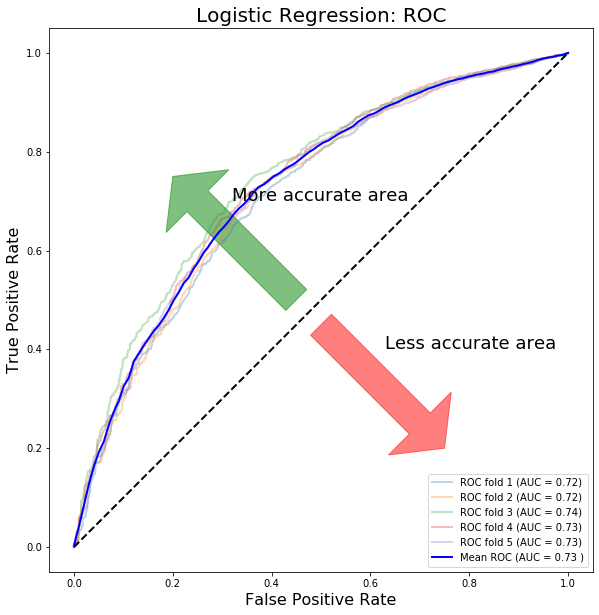

In [6]:
# ROC curve
random_state = np.random.RandomState(0)
cv = StratifiedKFold(n_splits=5,shuffle=False)
x = MLdata.loc[:,MLdata.columns[1:]]
y = MLdata.loc[:,['CASE_STATUS']]

# plot arrows
fig1 = plt.figure(figsize=[10,10])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5))
ax1.add_patch(patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5))
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1

#####where you need to modify -------------------------------------------------------------------------    
knn = LogisticRegression(max_iter=110,C=1.5,dual=False)
for train,test in cv.split(x,y):   
    
    prediction = knn.fit(x.iloc[train],np.ravel(y.iloc[train])).predict_proba(x.iloc[test])

#####where you need to modify -------------------------------------------------------------------------    

    fpr, tpr, t = roc_curve(y.iloc[test], prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
    
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)
print(aucs)
plt.xlabel('False Positive Rate',fontsize = 16)
plt.ylabel('True Positive Rate',fontsize = 16)
plt.title('Logistic Regression: ROC',fontsize = 20)
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 18)
plt.text(0.63,0.4,'Less accurate area',fontsize = 18)
plt.show()

C:\Users\amirt\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\amirt\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

C:\Users\amirt\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\amirt\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

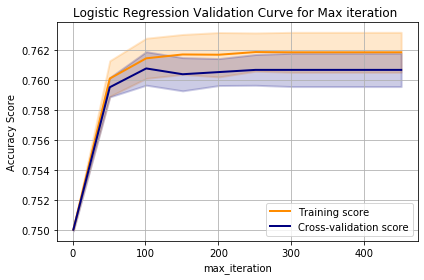

In [7]:
# validation curve
X = MLdata[MLdata.columns[1:]]
y = MLdata['CASE_STATUS']
cv = StratifiedKFold(4)
param_range = np.arange(1,500, 50)
lw = 2
#####where you need to modify -------------------------------------------------------------------------    
train_scores, test_scores = validation_curve(LogisticRegression(),X,y, param_name="max_iter",param_range=param_range, cv=cv)
#####where you need to modify -------------------------------------------------------------------------    


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.plot(param_range,train_scores_mean,label="Training score",color="darkorange",lw=lw)
plt.plot(param_range,test_scores_mean,label="Cross-validation score",color="navy", lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.2,color="darkorange", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.2,color="navy", lw=lw)
plt.title("Logistic Regression Validation Curve for Max iteration ")
plt.xlabel(r"max_iteration")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.grid()
plt.show()

C:\Users\amirt\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\amirt\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

C:\Users\amirt\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\amirt\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

C:\Users\amirt\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\amirt\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mod

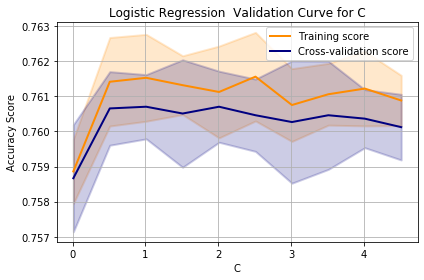

In [8]:
# validation curve
X = MLdata[MLdata.columns[1:]]
y = MLdata['CASE_STATUS']
cv = StratifiedKFold(4)
param_range = np.arange(.01,5, 0.5)
lw = 2
#####where you need to modify -------------------------------------------------------------------------    
train_scores, test_scores = validation_curve(LogisticRegression(),X,y, param_name="C",param_range=param_range, cv=cv)
#####where you need to modify -------------------------------------------------------------------------    


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
plt.plot(param_range,train_scores_mean,label="Training score",color="darkorange",lw=lw)
plt.plot(param_range,test_scores_mean,label="Cross-validation score",color="navy", lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.2,color="darkorange", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.2,color="navy", lw=lw)
plt.title("Logistic Regression  Validation Curve for C")
plt.xlabel(r"C")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.grid()
plt.show()

C:\Users\amirt\Anaconda3\envs\py37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Feature: 0, Score: 0.06434
Feature: 1, Score: -0.02013
Feature: 2, Score: 0.97733
Feature: 3, Score: -0.06950
Feature: 4, Score: -1.35701
Feature: 5, Score: 0.78989
Feature: 6, Score: -0.15909
Feature: 7, Score: -0.17085
Feature: 8, Score: 0.40888
Feature: 9, Score: 0.23140
Feature: 10, Score: 0.85899
Feature: 11, Score: 0.00737


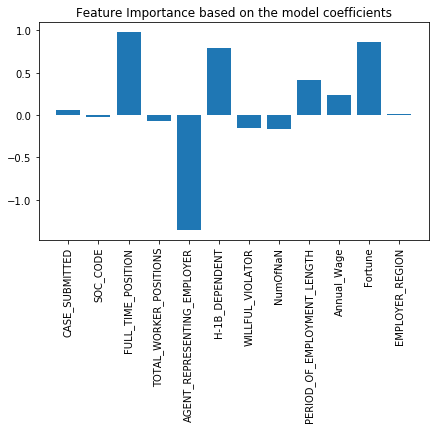

In [9]:
col=X.columns

# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset

# define the model
model = LogisticRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(7,4))
plt.title("Feature Importance based on the model coefficients")
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.xticks(range(X.shape[1]), col, rotation=90)
pyplot.show()
